In [ ]:
import pandas as pd
import seaborn as sns
import pdb
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
#open data
label_address = 'drive/My Drive/NFT.csv'
df = pd.read_csv(label_address)

Mounted at /content/drive


# Prepare data

In [ ]:
!pip install yfinance
import yfinance as yf
stock_use = "AAPL"
stock_data = yf.download(stock_use, start="2020-05-01", end="2021-12-01")

     |████████████████████████████████| 63 kB 1.6 MB/s 
     |████████████████████████████████| 6.4 MB 32.1 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
[*********************100%***********************]  1 of 1 completed


In [ ]:
len(stock_data)

400

In [ ]:
#date list of the dataset
date = stock_data['Close'].reset_index()['Date'][0:360].to_list()


In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 100)

In [ ]:
df.head(10)

,Unnamed: 0,Smart_contract,ID_token,Transaction_hash,Seller_address,Seller_username,Buyer_address,Buyer_username,Image_url_1,Image_url_2,Image_url_3,Image_url_4,Price_Crypto,Crypto,Price_USD,Name,Description,Collection,Market,Datetime_updated,Datetime_updated_seconds,Permanent_link,Unique_id_collection,Collection_cleaned,Category
0,4163811,0x06012c8cf97bead5deae237070f9587f8e7a266d,461189,0x127fdfbf5d72c8645539d1f3ea207540ef580712719d...,0xd68c2b3086f9d0e278b0e0aea23ed361fa7c28e1,0xd68c2b3086,0x3f537764f0b09436d1794fecb8713d5fcb8f182f,treetop,https://storage.opensea.io/0x06012c8cf97bead5d...,https://img.cryptokitties.co/0x06012c8cf97bead...,https://storage.opensea.io/0x06012c8cf97bead5d...,https://storage.opensea.io/0x06012c8cf97bead5d...,0.009000,ETH,7.630065,Phuz 3/4,*waves*! I'm Phuz 3/4. I enjoy licking doorkno...,Cryptokitties,OpenSea,2018-02-28 00:00:00,2018-02-28 23:04:39,https://opensea.io/assets/0x06012c8cf97bead5de...,"('Cryptokitties', '461189')",Cryptokittie,Art
1,4163828,0x06012c8cf97bead5deae237070f9587f8e7a266d,419180,0x2fed0f71679211da1fcb287e37f2cec51e631cd62e53...,0x062d6d315e6c8aa196b9072d749e3f3f3579fdd0,willaby2,0x7c22564ed22d398192bf38008228d64eb72765db,Original-CW,https://storage.opensea.io/0x06012c8cf97bead5d...,https://img.cryptokitties.co/0x06012c8cf97bead...,https://storage.opensea.io/0x06012c8cf97bead5d...,https://storage.opensea.io/0x06012c8cf97bead5d...,0.050000,ETH,42.389250,OG CW Serpent 🐍 (51/153),*waves*! I'm OG CW Serpent 🐍 (51/153). I want ...,Cryptokitties,OpenSea,2018-02-28 00:00:00,2018-02-28 22:07:27,https://opensea.io/assets/0x06012c8cf97bead5de...,"('Cryptokitties', '419180')",Cryptokittie,Art
2,4163836,0x06012c8cf97bead5deae237070f9587f8e7a266d,510542,0x2c242e41da6a16dd77c046a5cceaf9a0e1a1a4f694c2...,0xd387a6e4e84a6c86bd90c158c6028a58cc8ac459,Pranksy,0x7c22564ed22d398192bf38008228d64eb72765db,Original-CW,https://storage.opensea.io/0x06012c8cf97bead5d...,https://img.cryptokitties.co/0x06012c8cf97bead...,https://storage.opensea.io/0x06012c8cf97bead5d...,https://storage.opensea.io/0x06012c8cf97bead5d...,0.005000,ETH,4.238925,2/5 Onyx Wolfgrey,Bonjour! I'm 2/5 Onyx Wolfgrey. I used to do b...,Cryptokitties,OpenSea,2018-02-28 00:00:00,2018-02-28 21:58:38,https://opensea.io/assets/0x06012c8cf97bead5de...,"('Cryptokitties', '510542')",Cryptokittie,Art
3,4163839,0x06012c8cf97bead5deae237070f9587f8e7a266d,568768,0x742bb13b3e16fcc80efbc2ead57ec53234448bfc736c...,0x4886404ecfb86b759b27867afb0f64172eea1c53,PsyDuck,0x549022ad5cd11816eb7ce6ea15ae61c1fb4edb8a,NFTpain,https://storage.opensea.io/0x06012c8cf97bead5d...,https://img.cryptokitties.co/0x06012c8cf97bead...,https://storage.opensea.io/0x06012c8cf97bead5d...,https://storage.opensea.io/0x06012c8cf97bead5d...,0.068783,ETH,58.313478,---h ---f --5- ---f,Aloha. ---h ---f --5- ---f here. I'm here to e...,Cryptokitties,OpenSea,2018-02-28 00:00:00,2018-02-28 21:49:29,https://opensea.io/assets/0x06012c8cf97bead5de...,"('Cryptokitties', '568768')",Cryptokittie,Art
4,4163890,0x06012c8cf97bead5deae237070f9587f8e7a266d,518318,0x43d34dd51195b977048bda0f78d85f7c31cd219692d4...,0xca97a04e562a71d6fc95f335cb6adc5e07e2e8d8,Bjkitty22,0xf8e2867d1ac32f02f2e42ee0f1602e34d6bc3187,Countsnackula,https://storage.opensea.io/0x06012c8cf97bead5d...,https://img.cryptokitties.co/0x06012c8cf97bead...,https://storage.opensea.io/0x06012c8cf97bead5d...,https://storage.opensea.io/0x06012c8cf97bead5d...,0.007000,ETH,5.934495,Sass Dom & R1 Jambo,Jambo. My name's Sass Dom & R1 Jambo. I once c...,Cryptokitties,OpenSea,2018-02-28 00:00:00,2018-02-28 20:55:41,https://opensea.io/assets/0x06012c8cf97bead5de...,"('Cryptokitties', '518318')",Cryptokittie,Art
5,4163912,0x06012c8cf97bead5deae237070f9587f8e7a266d,479803,0xe6ce8834b47c9f275d5094bd49df5188e1836d41f270...,0x062d6d315e6c8aa196b9072d749e3f3f3579fdd0,willaby2,0xb87e73ad25086c43a16fe5f9589ff265f8a3a9eb,Heca,https://storage.opensea.io/0x06012c8cf97bead5d...,https://img.cryptokitties.co/0x06012c8cf97bead...,https://storage.opensea.io/

In [ ]:
df_test = df.groupby(['Collection_cleaned', 'Datetime_updated']).mean().reset_index()
count = df_test.groupby('Collection_cleaned').count().reset_index()
count1 = count[count['Datetime_updated'] >= 60]
col_list = count1['Collection_cleaned'].to_list()

In [ ]:
#construct time-series NFT price dataset
df_test = df.groupby(['Collection_cleaned', 'Datetime_updated']).mean().reset_index()
count = df_test.groupby('Collection_cleaned').count().reset_index()
count1 = count[count['Datetime_updated'] >= 60]
col_list = count1['Collection_cleaned'].to_list()

df_use = df_test[df_test['Collection_cleaned'].isin(col_list)]
date_list = df_use['Datetime_updated'][0:60].to_list()

matrix_df1 = pd.DataFrame()
matrix_df1['Aavegotchi'] = df_use[df_use['Collection_cleaned']=='Aavegotchi']['Price_USD'][0:60]
matrix_df1['Date'] = date_list
for i in col_list:
    ref = pd.DataFrame()
    ref[i] = df_use[df_use['Collection_cleaned']==i]['Price_USD'][0:60]
    ref['Date'] = date_list
    matrix_df1 = matrix_df1.merge(ref, how='left', on='Date')
matrix_df1 = matrix_df1.set_index('Date')

In [ ]:
matrix_df1.head(5)

,Aavegotchi_x,Aavegotchi_y,Arcona,Art,Autoglyph,Avatar,Axie,Bastard,Battle,Bccg,Binance,Bitsforai,Block,Brave,Chainbreaker,Chainguardian,Cheezewizard,Chibi,Chonknft,Codexrecord,Color,Comethspaceship,Cryptoassault,Cryptocube,Cryptoflowers,Cryptoink,Cryptokittie,Cryptomorph,Cryptomotor,Cryptoskull,Cryptospace,Cryptostampedition,Cryptovoxel,Cyber,Dark,Decentraland,Decentralized,Digital,Dissolution,Distantvoice,Dokidoki,Dontrugme,Dragon,Duckdaohunter,Eart,Enjin,Ethera,Etherkingdom,Etherlegend,Ethmen,Fdeltatime,Flower,Ftbattlecard,Garycatlidge,Gegodego,Godsunchained,Hashmask,Instartoken,Joyworld,King,Knownorigin,Leagueofkingdom,Lord,Lostrelic,Lux,Maker,Marahgemx,Marblecard,Maxo,Megacryptopoli,Meme,Meta,Mirandu,Miscellanea,Mlbchampion,Mycrypto,Neon,Nft,Nifty,Pepe,Pgfk,Pix,Plasmabear,Play,Poap,Polkapet,Prokopevoneeth,Rare,Rari,Redlioneyegazette,Robns,Ropemakersunited,Rudeboy,Sandbox,Somniumspace,Sorare,Strongblocknft,Superrare,Terra,Thorchaincollectible,Toshimonminter,Townstar,Twerky,Urbitid,Vnft,Warrider,Weird,Wrapped
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-10-20 00:00:00,376.970000,376.970000,1.181804,78.368251,333.517500,2188.250000,13.79074,64.608886,19.384206,195.881493,64.421059,20.807500,30.584200,13.420000,639.641000,105.680750,118.563989,339.212109,373.001773,0.985637,76.137401,557.171778,29.116500,56.545500,2.025350,0.201361,1.260023,42.985000,14.657400,1.433238,17.468790,9.80640,88.735953,3.718050,1.890270,436.450391,1.950102,0.064225,1.952500,11.56200,47.201904,114.390000,3.71925,133.935000,0.974775,0.189689,13.415436,27.109600,1.237075,55.82340,33409.335877,5.414241,8.096666,79.262000,232.132788,21.188805,601.350200,21.079333,102.448929,35.123000,49.181000,256.531250,1260.560000,1.730150,62.21950,5.647462,6.963502,18.818250,14.790571,16.351992,0.264365,2.156600,363.401375,14.1556,19.634062,49.637675,225.143750,132.091750,13.857684,19.032458,769.202084,34.5105,17.683126,4.2135,1.411613,345.123503,25.938900,241.33500,4.574390,34.199545,23.2440,265.175710,116.111850,59.417635,173.439670,440.567350,350.126700,152.340500,3.827319,210.442750,27.406750,11.214569,122.223000,3246.078018,21.660845,9.353924,4.99149,464.669589
2020-10-21 00:00:00,162.488044,162.488044,7.485912,155.756250,186.717402,2237.000000,11.77110,127.229850,18.201087,363.673000,56.357759,9.516928,23.602500,23.115638,623.268000,112.510896,641.237925,38.769471,406.220111,0.075595,57.704327,480.053029,3.446039,57.747750,0.759795,2.981664,1.297226,41.327471,74.717396,1.397887,19.019700,8.83286,66.893084,3.460125,0.722141,804.851250,0.204985,1.032818,1.846019,3.45075,8.534701,94.048750,4.36740,15.759952,6.331625,90.340000,9.189369,36.247292,2.093933,29.13210,23230.168063,4.388550,25.989150,132.330000,181.809902,31.940476,1347.481105,19.872884,167.206174,9.969000,2.245150,121.115764,754.709723,8.249885,85.20360,17.350500,6.875869,255.165557,30.015000,19.326333,1.841800,2.319885,80.988930,11.6000,154.360732,42.429365,89.625420,0.946825,16.794464,451.740000,684.565141,36.3990,2.651800,5.5646,17.913372,383.549517,24.207460,60.87250,9.150016,25.248667,24.0065,1359.830000,110.653304,56.249839,177.388509,24.559258,322.835417,50.092986,7.422370,186.046875,9.397085,225.338525,33.964150,4175.145139,21.117158,9.452183,4.92744,608.646000
2020-10-22 00:00:00,335.126183,335.126183,2.043750,152.131500,300.737496,895.238161,15.25510,376.970000,61.054977,285.970439,27.506132,23.179650,103.749000,3.679770,673.120250,670.035213,260.921574,14.657392,9.925375,20.142750,12.815170,260.079174,3.781000,60.944250,0.024741,8.449482,35.006149,70.826553,135.250476,2.532650,208.734890,35.13900,93.365078,3.532375,6.983400,1530.600000,166.968761,5.338867,3.432936,2.22520,17.334520,111.900532,1.38080,26.560814,1.221450,8.841250,1.450000,2.257440,2.329300,71.52075,433.600518,1.171866,6.145944,66.720000,175.189160,21.343535,1966.461753,6.343883,520.388513,16.569111,20.874000,41.425560,329.368456,46.217500,72.34395,45.55229

In [ ]:
from statsmodels.tsa.api import Holt

def holt(y,y_to_train,y_to_test,smoothing_level,smoothing_slope, predict_date):
    y.plot(marker='o', color='black', legend=True, figsize=(14, 7))
    
    fit1 = Holt(y_to_train).fit(smoothing_level, smoothing_slope, optimized=False)
    fcast1 = fit1.forecast(predict_date).rename("Holt's linear trend")
    mse1 = ((fcast1 - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of Holt''s Linear trend {}'.format(round(np.sqrt(mse1), 2)))

    fit2 = Holt(y_to_train, exponential=True).fit(smoothing_level, smoothing_slope, optimized=False)
    fcast2 = fit2.forecast(predict_date).rename("Exponential trend")
    mse2 = ((fcast2 - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of Holt''s Exponential trend {}'.format(round(np.sqrt(mse2), 2)))
    
    fit1.fittedvalues.plot(marker="o", color='blue')
    fcast1.plot(color='blue', marker="o", legend=True)
    fit2.fittedvalues.plot(marker="o", color='red')
    fcast2.plot(color='red', marker="o", legend=True)

    plt.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Trained data 
y_to_train = matrix_df1['Autoglyph'][:50] # dataset to train
y_to_val = matrix_df1['Autoglyph'][10:] # last X months for test  
predict_date = 10 # the number of data points for the test set

In [ ]:
smoothing_level = 0.8
smoothing_slope = 0.6
predict_date = 100
fit1 = Holt(y_to_train).fit(smoothing_level, smoothing_slope, optimized=False)
fcast1 = fit1.forecast(predict_date).rename("Holt's linear trend")
fcast1

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


2020-12-09     143.576402
2020-12-10      64.184481
2020-12-11     -15.207440
2020-12-12     -94.599360
2020-12-13    -173.991281
2020-12-14    -253.383202
2020-12-15    -332.775123
2020-12-16    -412.167044
2020-12-17    -491.558965
2020-12-18    -570.950886
2020-12-19    -650.342806
2020-12-20    -729.734727
2020-12-21    -809.126648
2020-12-22    -888.518569
2020-12-23    -967.910490
2020-12-24   -1047.302411
2020-12-25   -1126.694331
2020-12-26   -1206.086252
2020-12-27   -1285.478173
2020-12-28   -1364.870094
2020-12-29   -1444.262015
2020-12-30   -1523.653936
2020-12-31   -1603.045857
2021-01-01   -1682.437777
2021-01-02   -1761.829698
2021-01-03   -1841.221619
2021-01-04   -1920.613540
2021-01-05   -2000.005461
2021-01-06   -2079.397382
2021-01-07   -2158.789302
2021-01-08   -2238.181223
2021-01-09   -2317.573144
2021-01-10   -2396.965065
2021-01-11   -2476.356986
2021-01-12   -2555.748907
2021-01-13   -2635.140828
2021-01-14   -2714.532748
2021-01-15   -2793.924669
2021-01-16  

# Data augmentation 
Extend the lenght of the dataset to 360

In [ ]:
import numpy as np
from statsmodels.tsa.api import SimpleExpSmoothing 


In [ ]:
len(matrix_df1)

60

In [ ]:

from statsmodels.tsa.api import ExponentialSmoothing
matrix_df1 = matrix_df1.drop('Aavegotchi_x', axis=1)
matrix_df1.rename(columns = {'Aavegotchi_y':'Aavegotchi'}, inplace = True)

In [ ]:
date_list = df_use['Datetime_updated'][0:300].to_list()
y_to_train = matrix_df1['Autoglyph']# dataset to train
y_to_val = matrix_df1['Autoglyph'][10:] # last X months for test  
predict_date = 300 # the number of data points for the test set
seasonal_period = 10
matrix_df3 = pd.DataFrame()
fit2 = ExponentialSmoothing(y_to_train, seasonal_periods = seasonal_period, trend='add', seasonal='mul', damped=True).fit(use_boxcox=True)
fcast2 = fit2.forecast(predict_date).rename('Additive+damped').to_list()
matrix_df3['Autoglyph'] = fcast2
matrix_df3['Date'] = date_list
for i in col_list:
    ref = pd.DataFrame()
    fit = ExponentialSmoothing(matrix_df1[i], seasonal_periods = seasonal_period, trend='add', seasonal='mul', damped=True).fit(use_boxcox=True)
    fcast = fit.forecast(predict_date).rename('Additive+damped').to_list()
    ref[i] = fcast
    matrix_df3 = pd.concat([matrix_df3, ref], 
                  axis = 1)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packa

In [ ]:
#preprocessing 
muse = matrix_df3.dropna(axis=1,how='all')
muse1 = muse.dropna(axis=1,thresh=2)
muse1 = muse1.set_index('Date')
new_feed = matrix_df1[muse1.columns].append(muse1)
new_feed = new_feed.drop('Autoglyph', axis=1)
new_col_list = new_feed.columns.to_list()
new_feed = new_feed.dropna(axis=1)
new_feed = new_feed.reset_index()
new_feed = new_feed.drop('Date', axis=1)
new_feed['Date'] = date
new_feed = new_feed.set_index('Date')
new_feed.head(5)

In [ ]:
new_feed.shape

(360, 65)

In [ ]:
len(date)

360

In [ ]:
new_feed.head(5)

,Aavegotchi,Arcona,Art,Axie,Bastard,Battle,Binance,Bitsforai,Block,Brave,Chainbreaker,Cheezewizard,Chibi,Codexrecord,Comethspaceship,Cryptoassault,Cryptocube,Cryptoflowers,Cryptoink,Cryptomorph,Cryptomotor,Cryptoskull,Cryptospace,Cryptovoxel,Dissolution,Distantvoice,Dragon,Ethera,Etherkingdom,Ethmen,Fdeltatime,Garycatlidge,Gegodego,Godsunchained,Joyworld,King,Leagueofkingdom,Lord,Lostrelic,Lux,Maker,Marblecard,Maxo,Megacryptopoli,Meme,Meta,Mirandu,Mlbchampion,Mycrypto,Neon,Nifty,Pgfk,Pix,Polkapet,Robns,Ropemakersunited,Rudeboy,Sandbox,Superrare,Thorchaincollectible,Townstar,Twerky,Urbitid,Warrider,Weird
0,376.970000,1.181804,78.368251,13.79074,64.608886,19.384206,64.421059,20.807500,30.584200,13.420000,639.641000,118.563989,339.212109,0.985637,557.171778,29.116500,56.545500,2.025350,0.201361,42.985000,14.657400,1.433238,17.468790,88.735953,1.952500,11.56200,3.71925,13.415436,27.109600,55.82340,33409.335877,79.262000,232.132788,21.188805,102.448929,35.123000,256.531250,1260.560000,1.730150,62.21950,5.647462,18.818250,14.790571,16.351992,0.264365,2.156600,363.401375,19.634062,49.637675,225.143750,13.857684,769.202084,34.5105,345.123503,23.2440,265.175710,116.111850,59.417635,152.340500,210.442750,11.214569,122.223000,3246.078018,9.353924,4.99149
1,162.488044,7.485912,155.756250,11.77110,127.229850,18.201087,56.357759,9.516928,23.602500,23.115638,623.268000,641.237925,38.769471,0.075595,480.053029,3.446039,57.747750,0.759795,2.981664,41.327471,74.717396,1.397887,19.019700,66.893084,1.846019,3.45075,4.36740,9.189369,36.247292,29.13210,23230.168063,132.330000,181.809902,31.940476,167.206174,9.969000,121.115764,754.709723,8.249885,85.20360,17.350500,255.165557,30.015000,19.326333,1.841800,2.319885,80.988930,154.360732,42.429365,89.625420,16.794464,684.565141,36.3990,383.549517,24.0065,1359.830000,110.653304,56.249839,50.092986,186.046875,225.338525,33.964150,4175.145139,9.452183,4.92744
2,335.126183,2.043750,152.131500,15.25510,376.970000,61.054977,27.506132,23.179650,103.749000,3.679770,673.120250,260.921574,14.657392,20.142750,260.079174,3.781000,60.944250,0.024741,8.449482,70.826553,135.250476,2.532650,208.734890,93.365078,3.432936,2.22520,1.38080,1.450000,2.257440,71.52075,433.600518,66.720000,175.189160,21.343535,520.388513,16.569111,41.425560,329.368456,46.217500,72.34395,45.552297,12.438566,4.691485,2.599575,3.367300,20.402400,79.041000,22.198000,74.660543,85.119117,54.151914,563.964181,37.2410,499.734852,23.1240,278.895000,143.473886,73.647410,29.653000,590.315000,3.217500,17.479867,78.772500,6.913787,20.06122
3,121.855469,14.172813,154.743750,101.51750,236.869985,19.052202,28.214384,10.115839,7.977825,0.690809,1400.140341,86.660000,18.483003,1.038154,176.066610,24.048000,61.153230,0.002502,0.285087,36.692362,65.153750,1.708187,29.910375,121.187880,6.586795,4.53110,17.02800,18.619500,8.272720,28.53390,190.305000,42.337416,74.035671,27.717267,401.280086,43.112475,38.866575,420.040944,13.730135,34.71100,50.777905,104.254691,26.936078,2.894902,0.151425,39.396876,220.613636,5.563875,231.750369,126.668046,29.779358,680.290722,38.6155,545.316021,23.0050,746.299575,127.316057,58.000000,37.233000,238.188922,3.113280,83.145300,70.612500,39.904900,5.41464
4,36.060269,27.775000,51.370875,43.53090,8.381925,15.119358,25.476859,1.813350,17.963500,14.264400,560.638584,15.188688,11.732250,3.577350,241.659307,17.212967,58.725585,1.884610,6.663000,60.247500,102.752100,1.931280,69.993000,103.761988,4.157550,33.86475,0.60745,2.532420,8.882199,29.56710,129.552600,113.478300,42.003787,13.986269,1113.196800,19.941900,126.185000,321.480441,2.047900,63.98640,280.931233,16.845120,27.840840,6.809756,0.152105,16.302737,77.077945,15.939660,857.114545,66.647092,8.257043,664.664250,32.9655,595.349189,22.2520,286.016472,237.837925,46.322350,66.278333,118.829580,18.743500,144.401321,69.257500,7.689992,39.81000


The Compound Annual Growth Rate allows us to see the annual performance of an asset or portfolio to obtain its current market value from its initial value. The CAGR assumes that the earnings obtained by the portfolio are reinvested at the end of each year and allows an easy comparison between different strategies.

The Sharpe ratio allows us to analyze the return obtained for each unit of risk assumed within the portfolio. On the other hand, the risk-free rate is used to isolate the returns associated with investments. We can use the 2 measures mentioned above to calculate the performance and volatility of the portfolio

# Strategy

In [99]:
class Strategy:
    def __init__(self, df, test_df, fund):
        self.df = df
        self.test_df = test_df
        self.fund = fund
    
    #Choose strategy based on return
    def test_mvr(df, new_feed, funds):
      mu = mean_historical_return(df)
      S = df.cov()
      ef_cvar = EfficientCVaR(mu, S)
      cvar_weights = ef_cvar.min_cvar()
      cleaned_weights = ef_cvar.clean_weights()
      weights = list(cleaned_weights.values())
      ret_data = new_feed.pct_change()[1:]
      weighted_returns1 = ret_data * weights
      weighted_returns1['Sum_return'] = weighted_returns1.sum(axis=1)
      weighted_returns1['Cum_return'] = weighted_returns1['Sum_return'].cumsum()
      weighted_returns1['Cum_return'].replace([np.inf, -np.inf], np.nan, inplace=True)
      cum_list = weighted_returns1['Cum_return'].dropna()
      cum_return = cum_list[-1]
      return cum_return

    def test_hrp(df, new_feed, funds):
      mu = mean_historical_return(df)
      S = CovarianceShrinkage(df).ledoit_wolf()
      returns = df.pct_change().dropna()
      hrp = HRPOpt(returns)
      cleaned_weights = hrp.optimize()
      weights = list(cleaned_weights.values())
      ret_data = new_feed.pct_change()[1:]
      weighted_returns1 = ret_data * weights
      weighted_returns1['Sum_return'] = weighted_returns1.sum(axis=1)
      weighted_returns1['Cum_return'] = weighted_returns1['Sum_return'].cumsum()
      weighted_returns1['Cum_return'].replace([np.inf, -np.inf], np.nan, inplace=True)
      cum_list = weighted_returns1['Cum_return'].dropna()
      cum_return = cum_list[-1]
      return cum_return
    
    def test_mcvr(df, new_feed, funds):
      mu = mean_historical_return(df)
      S = df.cov()
      ef_cvar = EfficientCVaR(mu, S)
      cvar_weights = ef_cvar.min_cvar()
      cleaned_weights = ef_cvar.clean_weights()
      weights = list(cleaned_weights.values())
      ret_data = new_feed.pct_change()[1:]
      weighted_returns1 = ret_data * weights
      weighted_returns1['Sum_return'] = weighted_returns1.sum(axis=1)
      weighted_returns1['Cum_return'] = weighted_returns1['Sum_return'].cumsum()
      weighted_returns1['Cum_return'].replace([np.inf, -np.inf], np.nan, inplace=True)
      cum_list = weighted_returns1['Cum_return'].dropna()
      cum_return = cum_list[-1]
      return cum_return


    #hrp
    def hrp(df, test_df, funds):
      mu = mean_historical_return(df)
      S = CovarianceShrinkage(df).ledoit_wolf()
      returns = df.pct_change().dropna()
      hrp = HRPOpt(returns)
      hrp_weights = hrp.optimize()
      labels = list(hrp_weights.keys())
      values = list(hrp_weights.values())
      fig, ax = plt.subplots()
      ax.pie(values, labels=labels, autopct='%1.0f%%')
      plt.show(fig)
      print('Strategy2 : Hierarchical Risk Parity (HRP) Strategy ')
      portfolio_amount = funds
      if portfolio_amount != '' :
        # Get discrete allocation of each share per stock

        latest_prices = get_latest_prices(df)
        weights = hrp_weights
        discrete_allocation = DiscreteAllocation(weights, latest_prices , total_portfolio_value = int(portfolio_amount))
        allocation , leftover = discrete_allocation.lp_portfolio()

        discrete_allocation_list = []


        for symbol in allocation:
            discrete_allocation_list.append(allocation.get(symbol))


        portfolio_df = pd.DataFrame(columns =['Ticker' , 'Number of stocks to buy'])

        portfolio_df['Ticker'] = allocation
        portfolio_df['Number of stocks to buy'] = discrete_allocation_list
        print('Number of stocks to buy with the amount of ₨ ' + str(portfolio_amount))
        print(portfolio_df)
        print('Funds remaining with you will be: ₨' , int(leftover))
      #Test with historical data with portfolio
      #Close price historical returns
      weights = list(hrp_weights.values())
      ret_data = test_df.pct_change()[1:]
      weighted_returns1 = ret_data * weights
      fig, ax = plt.subplots(figsize=(15,8))
      for i in weighted_returns1.columns.values :
          ax.plot(df[i], label = i)
      ax.set_title("Portfolio Daily return History")
      ax.set_xlabel('Date', fontsize=18)
      ax.set_ylabel('Close Price INR (₨)' , fontsize=18)
      ax.legend(weighted_returns1.columns.values , loc = 'upper left')
      plt.show(fig)
      #Plot cumulative return
      weighted_returns1['Sum_return'] = weighted_returns1.sum(axis=1)
      weighted_returns1['Cum_return'] = weighted_returns1['Sum_return'].cumsum()
      print('Cummulative Returns')
      plt.plot(weighted_returns1['Cum_return'], marker='o', color='r')
      #plt.plot(weighted_returns1['Cum_return'], marker='o', color='g')
      #cum_return = sum(weighted_returns1['Sum_return'])
      #print('Cummulative Returns: ' + str(cum_return))
    # Labelling 

      plt.xlabel("Date")
      plt.ylabel("cum returns")
      plt.title("cumulative returns")

    # Display

      plt.show() 
      #risk plot
      weighted_returns1.plot(kind = "box",figsize = (30,10), title = "Risk Box Plot")
      performance = hrp.portfolio_performance(verbose=True)
      latest_prices = get_latest_prices(matrix_df1)
      da_cvar = DiscreteAllocation(hrp_weights, latest_prices, total_portfolio_value=funds)
      allocation, leftover = da_cvar.greedy_portfolio()
      weighted_returns1['Cum_return'].replace([np.inf, -np.inf], np.nan, inplace=True)
      cum_list = weighted_returns1['Cum_return'].dropna()
      cum_return = cum_list[-1]
      print('Cummulative Returns: ' + str(cum_return))
      print("Funds remaining (CVAR): ${:.2f}".format(leftover))


    #MCVR
    def mcvar(df, test_df, funds):
      mu = mean_historical_return(df)
      S = df.cov()
      ef_cvar = EfficientCVaR(mu, S)
      cvar_weights = ef_cvar.min_cvar()
      cleaned_weights = ef_cvar.clean_weights()
      labels = list(cleaned_weights.keys())
    # Get the Values and store them in a list
      values = list(cleaned_weights.values())
      fig, ax = plt.subplots()
      ax.pie(values, labels=labels, autopct='%1.0f%%')
      plt.show(fig)
      print('Strategy3 : Mean Conditional Value at Risk ')
      portfolio_amount = funds
      if portfolio_amount != '' :
        # Get discrete allocation of each share per stock

        latest_prices = get_latest_prices(df)
        weights = cleaned_weights
        discrete_allocation = DiscreteAllocation(weights, latest_prices , total_portfolio_value = int(portfolio_amount))
        allocation , leftover = discrete_allocation.lp_portfolio()

        discrete_allocation_list = []


        for symbol in allocation:
            discrete_allocation_list.append(allocation.get(symbol))


        portfolio_df = pd.DataFrame(columns =['Ticker' , 'Number of stocks to buy'])

        portfolio_df['Ticker'] = allocation
        portfolio_df['Number of stocks to buy'] = discrete_allocation_list
        print('Number of stocks to buy with the amount of ₨ ' + str(portfolio_amount))
        print(portfolio_df)
        print('Funds remaining with you will be: ₨' , int(leftover))
      #Test with historical data with portfolio
      #Close price historical returns
      weights = list(cleaned_weights.values())
      ret_data = test_df.pct_change()[1:]
      weighted_returns1 = ret_data * weights
      fig, ax = plt.subplots(figsize=(15,8))
      for i in weighted_returns1.columns.values :
          ax.plot(df[i], label = i)
      ax.set_title("Portfolio Daily return History")
      ax.set_xlabel('Date', fontsize=18)
      ax.set_ylabel('Close Price INR (₨)' , fontsize=18)
      ax.legend(weighted_returns1.columns.values , loc = 'upper left')
      plt.show(fig)
      #Plot cumulative return
      weighted_returns1['Sum_return'] = weighted_returns1.sum(axis=1)
      weighted_returns1['Cum_return'] = weighted_returns1['Sum_return'].cumsum()
      plt.plot(weighted_returns1['Cum_return'], marker='o', color='r')
      #plt.plot(weighted_returns1['Cum_return'], marker='o', color='g')

    # Labelling 

      plt.xlabel("Date")
      plt.ylabel("cum returns")
      plt.title("cumulative returns")

    # Display

      plt.show() 
      #risk plot
      weighted_returns1.plot(kind = "box",figsize = (30,10), title = "Risk Box Plot")
      performance = ef_cvar.portfolio_performance(verbose=True)
      latest_prices = get_latest_prices(matrix_df1)
      da_cvar = DiscreteAllocation(cvar_weights, latest_prices, total_portfolio_value=funds)
      allocation, leftover = da_cvar.greedy_portfolio()
      weighted_returns1['Cum_return'].replace([np.inf, -np.inf], np.nan, inplace=True)
      cum_list = weighted_returns1['Cum_return'].dropna()
      cum_return = cum_list[-1]
      print('Cummulative Returns: ' + str(cum_return))
      print("Funds remaining (CVAR): ${:.2f}".format(leftover))

    #Mean variance
    def mean_variance(df, new_feed, funds):
      mu = mean_historical_return(df)
      S = CovarianceShrinkage(df).ledoit_wolf()
      ef = EfficientFrontier(mu, S)
      weights = ef.max_sharpe()
      cleaned_weights = ef.clean_weights()
      labels = list(cleaned_weights.keys())
      values = list(cleaned_weights.values())
      fig, ax = plt.subplots()
      ax.pie(values, labels=labels, autopct='%1.0f%%')
      plt.show(fig)
      print('Strategy2 : Hierarchical Risk Parity (HRP) Strategy ')
      portfolio_amount = funds
      if portfolio_amount != '' :
        # Get discrete allocation of each share per stock

        latest_prices = get_latest_prices(df)
        weights = cleaned_weights
        discrete_allocation = DiscreteAllocation(weights, latest_prices , total_portfolio_value = int(portfolio_amount))
        allocation , leftover = discrete_allocation.lp_portfolio()

        discrete_allocation_list = []


        for symbol in allocation:
            discrete_allocation_list.append(allocation.get(symbol))


        portfolio_df = pd.DataFrame(columns =['Ticker' , 'Number of stocks to buy'])

        portfolio_df['Ticker'] = allocation
        portfolio_df['Number of stocks to buy'] = discrete_allocation_list
        print('Number of stocks to buy with the amount of ₨ ' + str(portfolio_amount))
        print(portfolio_df)
        print('Funds remaining with you will be: ₨' , int(leftover))
      #Test with historical data with portfolio
      #Close price historical returns
      weights = list(cleaned_weights.values())
      ret_data = new_feed.pct_change()[1:]
      weighted_returns1 = ret_data * weights
      fig, ax = plt.subplots(figsize=(15,8))
      for i in weighted_returns1.columns.values :
          ax.plot(df[i], label = i)
      ax.set_title("Portfolio Daily return History")
      ax.set_xlabel('Date', fontsize=18)
      ax.set_ylabel('Close Price INR (₨)' , fontsize=18)
      ax.legend(weighted_returns1.columns.values , loc = 'upper left')
      plt.show(fig)
      #Plot cumulative return
      weighted_returns1['Sum_return'] = weighted_returns1.sum(axis=1)
      weighted_returns1['Cum_return'] = weighted_returns1['Sum_return'].cumsum()
      cum_return = sum(weighted_returns1['Sum_return'])
      print('Cummulative Returns: ' + str(cum_return))
      plt.plot(weighted_returns1['Cum_return'], marker='o', color='r')
      #plt.plot(weighted_returns1['Cum_return'], marker='o', color='g')

    # Labelling 

      plt.xlabel("Date")
      plt.ylabel("cum returns")
      plt.title("cumulative returns")

    # Display

      plt.show() 
      #risk plot
      weighted_returns1.plot(kind = "box",figsize = (30,10), title = "Risk Box Plot")
      performance = ef.portfolio_performance(verbose=True)
      latest_prices = get_latest_prices(matrix_df1)
      da_cvar = DiscreteAllocation(cleaned_weights, latest_prices, total_portfolio_value=funds)
      allocation, leftover = da_cvar.greedy_portfolio()
      
      print("Funds remaining (CVAR): ${:.2f}".format(leftover))

    def main(self, df, test_df, fund, model=None):
      mean_variance_return = Strategy.test_mvr(df, test_df, fund)
      hrp_return = Strategy.test_hrp(df, test_df, fund)
      mcvr_return = Strategy.test_mcvr(df, test_df, fund)
      result = [mean_variance_return, hrp_return, mcvr_return]
      if model == None:
        if mean_variance_return == max(result):
          Strategy.mean_variance(self.df, self.test_df, self.fund)
        elif hrp_return == max(result):
          Strategy.hrp(self.df, self.test_df, self.fund)
        elif mcvr_return == max(result):
          Strategy.mcvar(self.df, self.test_df, self.fund)
      else:
        if model == 'mean_variance_return':
          Strategy.mean_variance(self.df, self.test_df, self.fund)
        elif model == 'hrp':
          Strategy.hrp(self.df, self.test_df, self.fund)
        elif model == 'mcvar':
          Strategy.mcvar(self.df, self.test_df, self.fund)
        else:
          print('Wrong model selection')



        



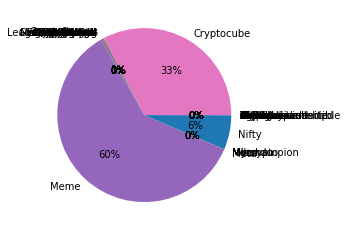

Strategy2 : Hierarchical Risk Parity (HRP) Strategy 
Number of stocks to buy with the amount of ₨ 1000
                      Ticker  Number of stocks to buy
Cryptoflowers  Cryptoflowers                        1
Meme                    Meme                        9
Meta                    Meta                        1
Funds remaining with you will be: ₨ 24


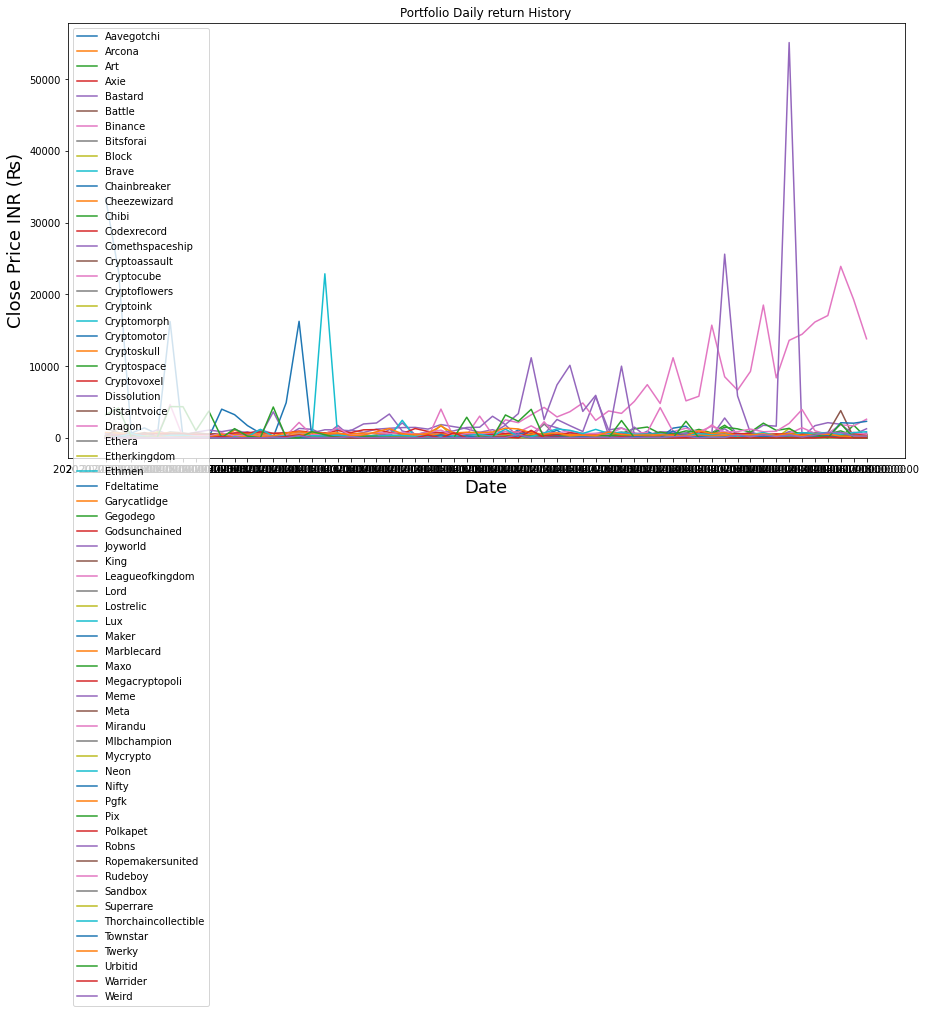

Cummulative Returns: 840.5599052667271


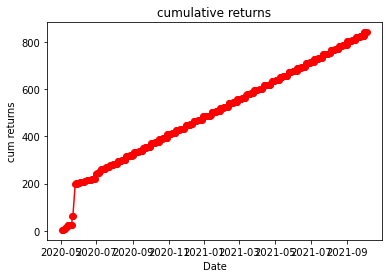

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Expected annual return: 2295124907582.3%
Annual volatility: 5840584954737605.0%
Sharpe Ratio: 0.00
Funds remaining (CVAR): $99.37


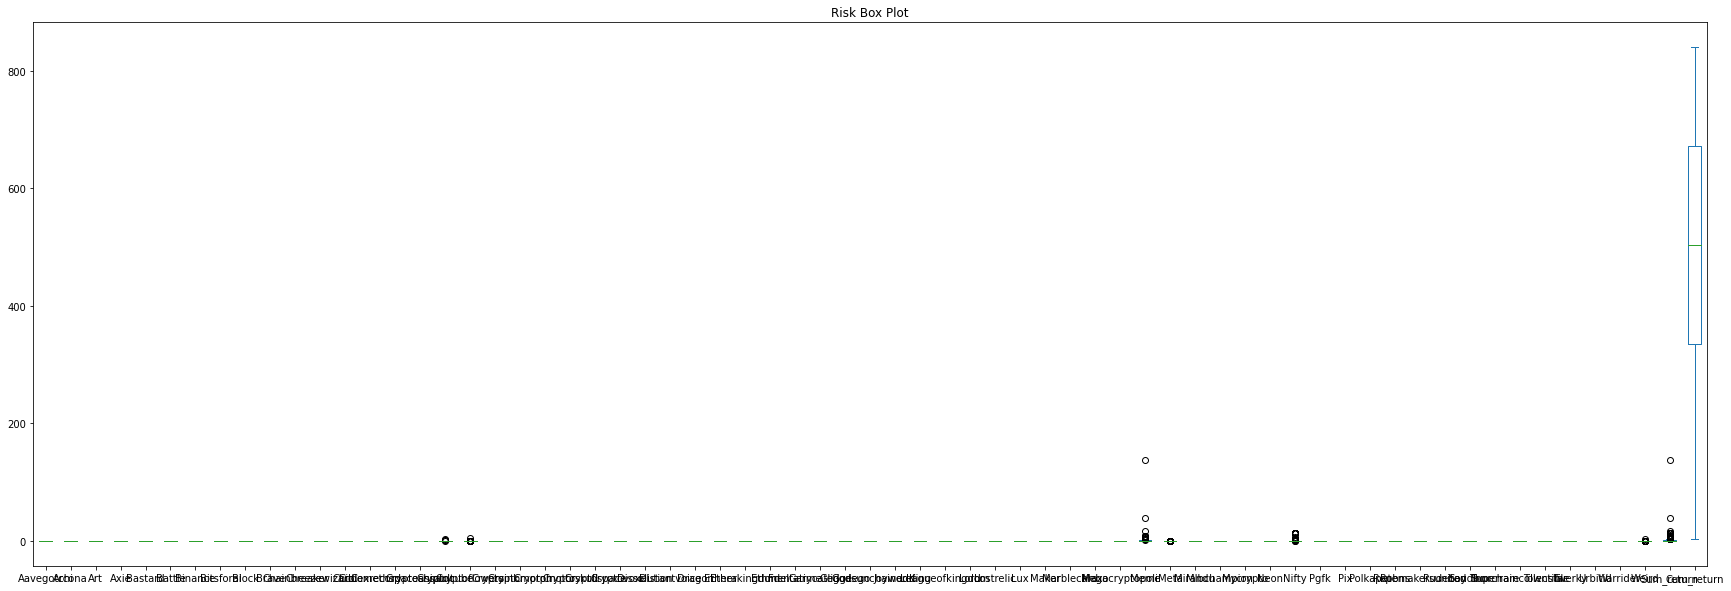

In [100]:
#example
investment = Strategy(matrix_df1, new_feed, 1000)
investment.main(matrix_df1, new_feed, 1000)

# Strategy Breakdown

# Mean Variance Optimization

In [ ]:
!pip install PyPortfolioOpt
from pypfopt.efficient_frontier import EfficientCVaR
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import HRPOpt
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
from pypfopt.efficient_frontier import EfficientCVaR
import matplotlib.pyplot as plt
portfolio = matrix_df1

In [ ]:
def mean_variance(df, new_feed, funds):
  mu = mean_historical_return(df)
  S = CovarianceShrinkage(df).ledoit_wolf()
  ef = EfficientFrontier(mu, S)
  weights = ef.max_sharpe()
  cleaned_weights = ef.clean_weights()
  labels = list(cleaned_weights.keys())
  values = list(cleaned_weights.values())
  fig, ax = plt.subplots()
  ax.pie(values, labels=labels, autopct='%1.0f%%')
  plt.show(fig)
  print('Strategy2 : Hierarchical Risk Parity (HRP) Strategy ')
  portfolio_amount = funds
  if portfolio_amount != '' :
    # Get discrete allocation of each share per stock

    latest_prices = get_latest_prices(df)
    weights = cleaned_weights
    discrete_allocation = DiscreteAllocation(weights, latest_prices , total_portfolio_value = int(portfolio_amount))
    allocation , leftover = discrete_allocation.lp_portfolio()

    discrete_allocation_list = []


    for symbol in allocation:
        discrete_allocation_list.append(allocation.get(symbol))


    portfolio_df = pd.DataFrame(columns =['Ticker' , 'Number of stocks to buy'])

    portfolio_df['Ticker'] = allocation
    portfolio_df['Number of stocks to buy'] = discrete_allocation_list
    print('Number of stocks to buy with the amount of ₨ ' + str(portfolio_amount))
    print(portfolio_df)
    print('Funds remaining with you will be: ₨' , int(leftover))
  #Test with historical data with portfolio
  #Close price historical returns
  weights = list(cleaned_weights.values())
  ret_data = new_feed.pct_change()[1:]
  weighted_returns1 = ret_data * weights
  fig, ax = plt.subplots(figsize=(15,8))
  for i in weighted_returns1.columns.values :
      ax.plot(df[i], label = i)
  ax.set_title("Portfolio Daily return History")
  ax.set_xlabel('Date', fontsize=18)
  ax.set_ylabel('Close Price INR (₨)' , fontsize=18)
  ax.legend(weighted_returns1.columns.values , loc = 'upper left')
  plt.show(fig)
  #Plot cumulative return
  weighted_returns1['Sum_return'] = weighted_returns1.sum(axis=1)
  weighted_returns1['Cum_return'] = weighted_returns1['Sum_return'].cumsum()
  cum_return = sum(weighted_returns1['Sum_return'])
  print('Cummulative Returns: ' + str(cum_return))
  plt.plot(weighted_returns1['Cum_return'], marker='o', color='r')
  #plt.plot(weighted_returns1['Cum_return'], marker='o', color='g')

# Labelling 

  plt.xlabel("Date")
  plt.ylabel("cum returns")
  plt.title("cumulative returns")

# Display

  plt.show() 
  #risk plot
  weighted_returns1.plot(kind = "box",figsize = (30,10), title = "Risk Box Plot")
  performance = ef.portfolio_performance(verbose=True)
  latest_prices = get_latest_prices(matrix_df1)
  da_cvar = DiscreteAllocation(cleaned_weights, latest_prices, total_portfolio_value=funds)
  allocation, leftover = da_cvar.greedy_portfolio()
  print("Funds remaining (CVAR): ${:.2f}".format(leftover))

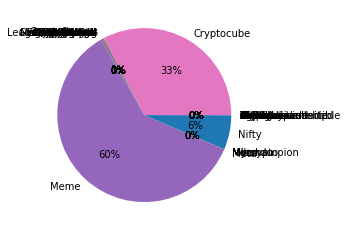

Strategy2 : Hierarchical Risk Parity (HRP) Strategy 
Number of stocks to buy with the amount of ₨ 10000
                      Ticker  Number of stocks to buy
Cryptoflowers  Cryptoflowers                        1
Meme                    Meme                       81
Meta                    Meta                        1
Nifty                  Nifty                        1
Weird                  Weird                        1
Funds remaining with you will be: ₨ 1113


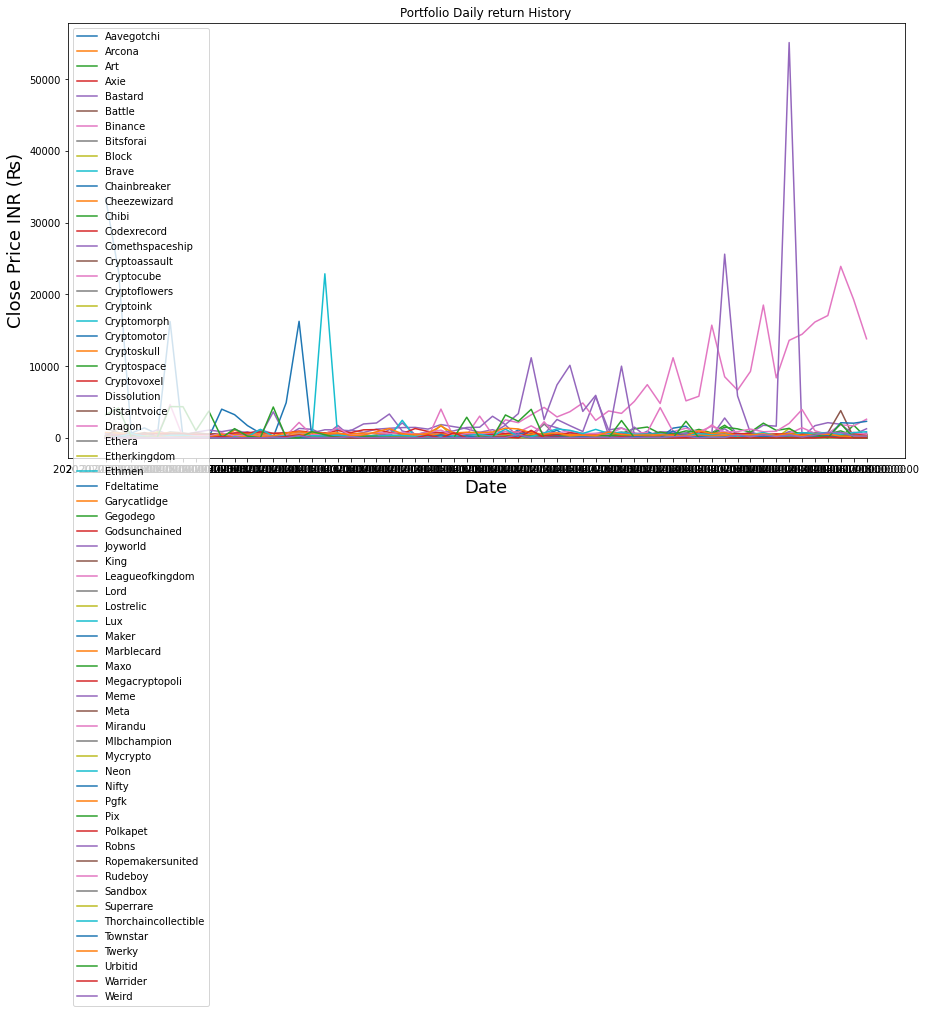

Cummulative Returns: 840.5599052667271


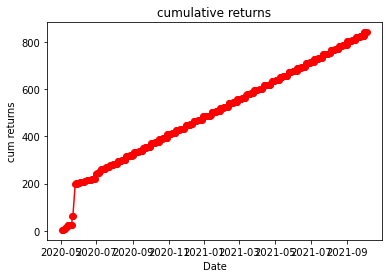

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Expected annual return: 2295124907582.3%
Annual volatility: 5840584954737605.0%
Sharpe Ratio: 0.00
Funds remaining (CVAR): $1188.36


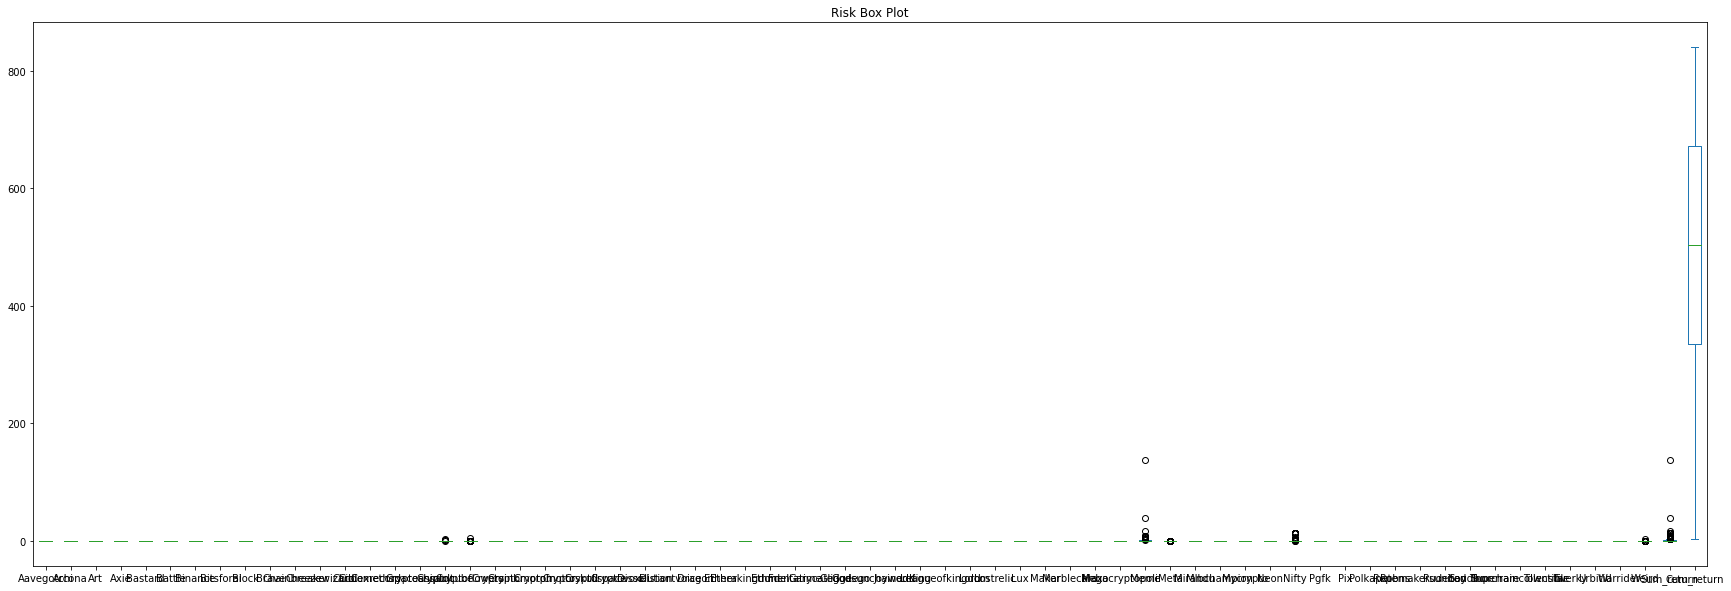

In [ ]:
mean_variance(portfolio, new_feed, 10000)

# Hierarchical Risk Parity (HRP) Strategy

The HRP method works by finding subclusters of similar assets based on returns and constructing a hierarchy from these clusters to generate weights for each asset. 

In [85]:
def hrp(df, test_df, funds):
  mu = mean_historical_return(df)
  S = CovarianceShrinkage(df).ledoit_wolf()
  returns = df.pct_change().dropna()
  hrp = HRPOpt(returns)
  hrp_weights = hrp.optimize()
  labels = list(hrp_weights.keys())
  values = list(hrp_weights.values())
  fig, ax = plt.subplots()
  ax.pie(values, labels=labels, autopct='%1.0f%%')
  plt.show(fig)
  print('Strategy2 : Hierarchical Risk Parity (HRP) Strategy ')
  portfolio_amount = funds
  if portfolio_amount != '' :
    # Get discrete allocation of each share per stock

    latest_prices = get_latest_prices(df)
    weights = hrp_weights
    discrete_allocation = DiscreteAllocation(weights, latest_prices , total_portfolio_value = int(portfolio_amount))
    allocation , leftover = discrete_allocation.lp_portfolio()

    discrete_allocation_list = []


    for symbol in allocation:
        discrete_allocation_list.append(allocation.get(symbol))


    portfolio_df = pd.DataFrame(columns =['Ticker' , 'Number of stocks to buy'])

    portfolio_df['Ticker'] = allocation
    portfolio_df['Number of stocks to buy'] = discrete_allocation_list
    print('Number of stocks to buy with the amount of ₨ ' + str(portfolio_amount))
    print(portfolio_df)
    print('Funds remaining with you will be: ₨' , int(leftover))
  #Test with historical data with portfolio
  #Close price historical returns
  weights = list(hrp_weights.values())
  ret_data = test_df.pct_change()[1:]
  weighted_returns1 = ret_data * weights
  fig, ax = plt.subplots(figsize=(15,8))
  for i in weighted_returns1.columns.values :
      ax.plot(df[i], label = i)
  ax.set_title("Portfolio Daily return History")
  ax.set_xlabel('Date', fontsize=18)
  ax.set_ylabel('Close Price INR (₨)' , fontsize=18)
  ax.legend(weighted_returns1.columns.values , loc = 'upper left')
  plt.show(fig)
  #Plot cumulative return
  weighted_returns1['Sum_return'] = weighted_returns1.sum(axis=1)
  weighted_returns1['Cum_return'] = weighted_returns1['Sum_return'].cumsum()
  print('Cummulative Returns')
  plt.plot(weighted_returns1['Cum_return'], marker='o', color='r')
  #plt.plot(weighted_returns1['Cum_return'], marker='o', color='g')
  #cum_return = sum(weighted_returns1['Sum_return'])
  #print('Cummulative Returns: ' + str(cum_return))
# Labelling 

  plt.xlabel("Date")
  plt.ylabel("cum returns")
  plt.title("cumulative returns")

# Display

  plt.show() 
  #risk plot
  weighted_returns1.plot(kind = "box",figsize = (30,10), title = "Risk Box Plot")
  performance = hrp.portfolio_performance(verbose=True)
  latest_prices = get_latest_prices(matrix_df1)
  da_cvar = DiscreteAllocation(hrp_weights, latest_prices, total_portfolio_value=funds)
  allocation, leftover = da_cvar.greedy_portfolio()
  weighted_returns1['Cum_return'].replace([np.inf, -np.inf], np.nan, inplace=True)
  cum_list = weighted_returns1['Cum_return'].dropna()
  cum_return = cum_list[-1]
  print('Cummulative Returns: ' + str(cum_return))
  print("Funds remaining (CVAR): ${:.2f}".format(leftover))
  

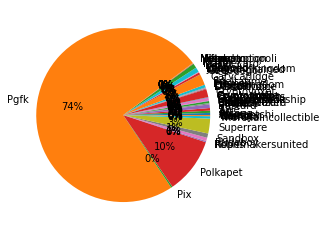

Strategy2 : Hierarchical Risk Parity (HRP) Strategy 
Number of stocks to buy with the amount of ₨ 10000
                        Ticker  Number of stocks to buy
Axie                      Axie                        2
Binance                Binance                        1
Chibi                    Chibi                       11
Cryptomorph        Cryptomorph                        1
Cryptoskull        Cryptoskull                        6
Cryptovoxel        Cryptovoxel                        2
Dragon                  Dragon                        2
Etherkingdom      Etherkingdom                        2
Garycatlidge      Garycatlidge                        2
Gegodego              Gegodego                        2
Godsunchained    Godsunchained                       20
Lux                        Lux                        1
Maxo                      Maxo                        1
Megacryptopoli  Megacryptopoli                        4
Mlbchampion        Mlbchampion                        1


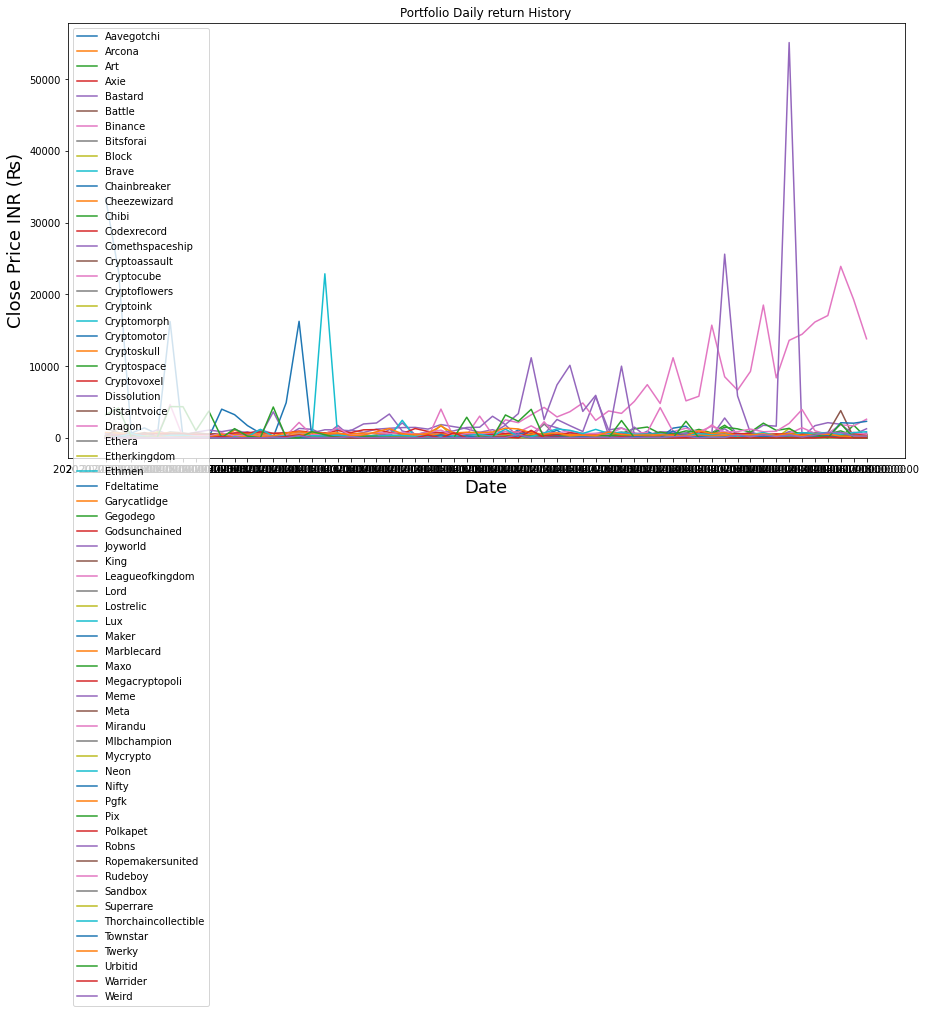

Cummulative Returns


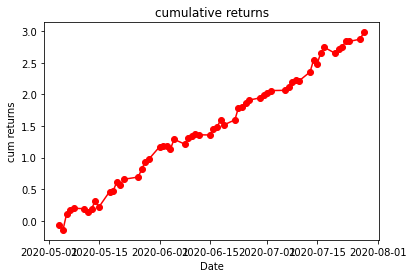

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


Expected annual return: 1227.2%
Annual volatility: 129.6%
Sharpe Ratio: 9.45
Cummulative Returns: 2.9831090615916986
Funds remaining (CVAR): $2.11


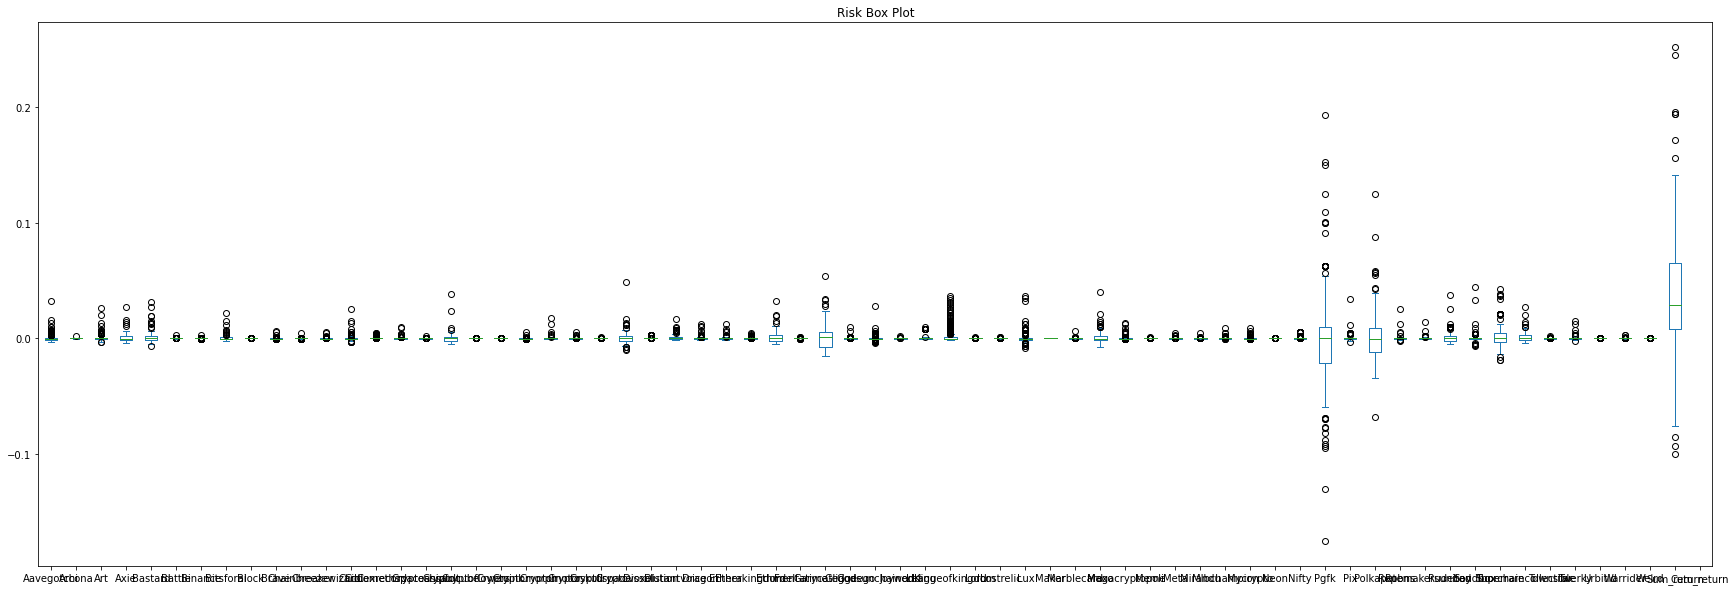

In [86]:
#Allocation:
hrp(portfolio, new_feed, 10000)

# Mean Conditional Value at Risk (mCVAR)
The mCVAR is another popular alternative to mean variance optimization. It works by measuring the worst-case scenarios for each asset in the portfolio, which is represented here by losing the most money. The worst-case loss for each asset is then used to calculate weights to be used for allocation for each asset. 

In [ ]:
matrix_df1 = matrix_df1[new_feed.columns.to_list()]

In [ ]:
matrix_df1.shape

(60, 65)

In [ ]:
new_feed.shape

(360, 65)

In [83]:
def mcvar(df, test_df, funds):
  mu = mean_historical_return(df)
  S = df.cov()
  ef_cvar = EfficientCVaR(mu, S)
  cvar_weights = ef_cvar.min_cvar()
  cleaned_weights = ef_cvar.clean_weights()
  labels = list(cleaned_weights.keys())
# Get the Values and store them in a list
  values = list(cleaned_weights.values())
  fig, ax = plt.subplots()
  ax.pie(values, labels=labels, autopct='%1.0f%%')
  plt.show(fig)
  print('Strategy3 : Mean Conditional Value at Risk ')
  portfolio_amount = funds
  if portfolio_amount != '' :
    # Get discrete allocation of each share per stock

    latest_prices = get_latest_prices(df)
    weights = cleaned_weights
    discrete_allocation = DiscreteAllocation(weights, latest_prices , total_portfolio_value = int(portfolio_amount))
    allocation , leftover = discrete_allocation.lp_portfolio()

    discrete_allocation_list = []


    for symbol in allocation:
        discrete_allocation_list.append(allocation.get(symbol))


    portfolio_df = pd.DataFrame(columns =['Ticker' , 'Number of stocks to buy'])

    portfolio_df['Ticker'] = allocation
    portfolio_df['Number of stocks to buy'] = discrete_allocation_list
    print('Number of stocks to buy with the amount of ₨ ' + str(portfolio_amount))
    print(portfolio_df)
    print('Funds remaining with you will be: ₨' , int(leftover))
  #Test with historical data with portfolio
  #Close price historical returns
  weights = list(cleaned_weights.values())
  ret_data = test_df.pct_change()[1:]
  weighted_returns1 = ret_data * weights
  fig, ax = plt.subplots(figsize=(15,8))
  for i in weighted_returns1.columns.values :
      ax.plot(df[i], label = i)
  ax.set_title("Portfolio Daily return History")
  ax.set_xlabel('Date', fontsize=18)
  ax.set_ylabel('Close Price INR (₨)' , fontsize=18)
  ax.legend(weighted_returns1.columns.values , loc = 'upper left')
  plt.show(fig)
  #Plot cumulative return
  weighted_returns1['Sum_return'] = weighted_returns1.sum(axis=1)
  weighted_returns1['Cum_return'] = weighted_returns1['Sum_return'].cumsum()
  plt.plot(weighted_returns1['Cum_return'], marker='o', color='r')
  #plt.plot(weighted_returns1['Cum_return'], marker='o', color='g')

# Labelling 

  plt.xlabel("Date")
  plt.ylabel("cum returns")
  plt.title("cumulative returns")

# Display

  plt.show() 
  #risk plot
  weighted_returns1.plot(kind = "box",figsize = (30,10), title = "Risk Box Plot")
  performance = ef_cvar.portfolio_performance(verbose=True)
  latest_prices = get_latest_prices(matrix_df1)
  da_cvar = DiscreteAllocation(cvar_weights, latest_prices, total_portfolio_value=funds)
  allocation, leftover = da_cvar.greedy_portfolio()
  weighted_returns1['Cum_return'].replace([np.inf, -np.inf], np.nan, inplace=True)
  cum_list = weighted_returns1['Cum_return'].dropna()
  cum_return = cum_list[-1]
  print('Cummulative Returns: ' + str(cum_return))
  print("Funds remaining (CVAR): ${:.2f}".format(leftover))


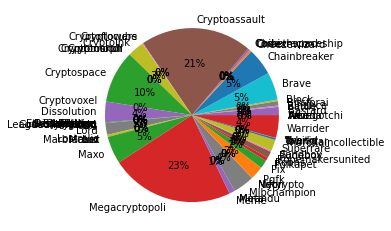

Strategy3 : Mean Conditional Value at Risk 
Number of stocks to buy with the amount of ₨ 1000
                        Ticker  Number of stocks to buy
Binance                Binance                        8
Brave                    Brave                        2
Chainbreaker      Chainbreaker                        3
Cheezewizard      Cheezewizard                        1
Cryptoassault    Cryptoassault                        4
Cryptoink            Cryptoink                       56
Cryptospace        Cryptospace                        4
Dissolution        Dissolution                        3
Gegodego              Gegodego                        1
Lord                      Lord                        6
Lostrelic            Lostrelic                        2
Megacryptopoli  Megacryptopoli                      104
Meme                      Meme                        1
Mlbchampion        Mlbchampion                       13
Superrare            Superrare                        1
Warrider  

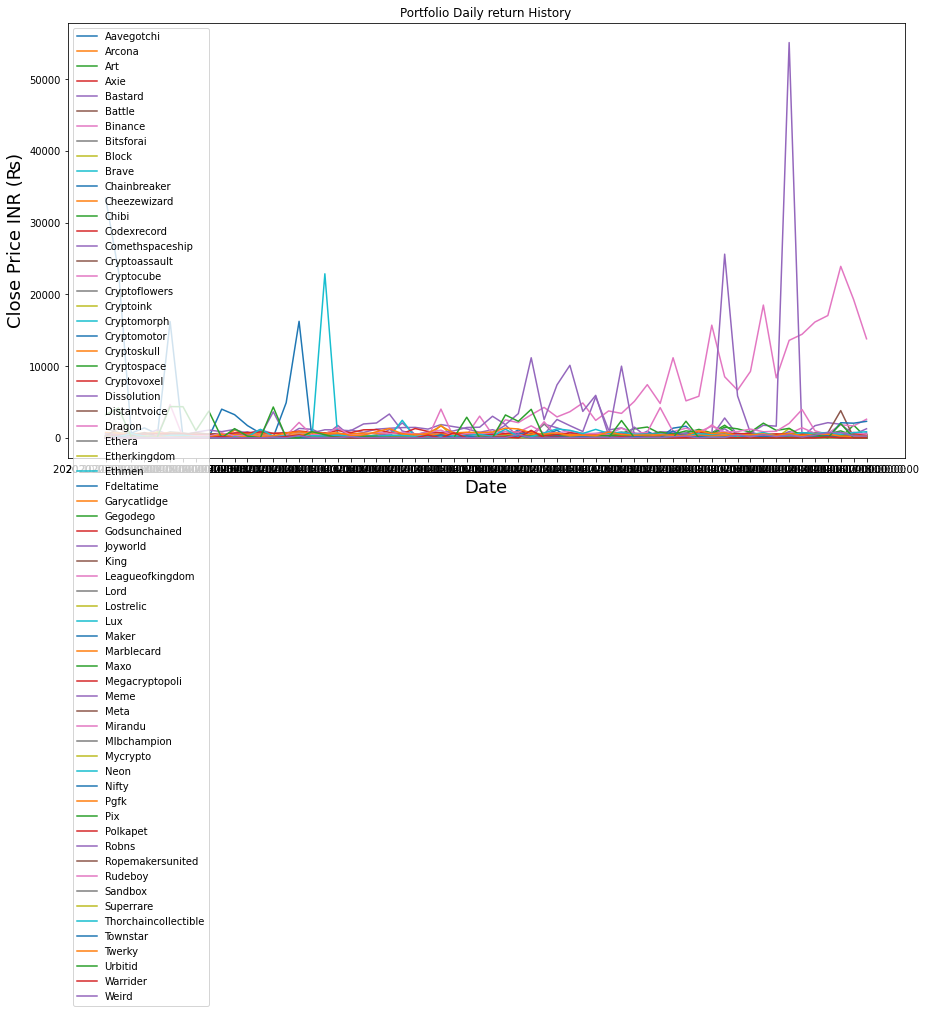

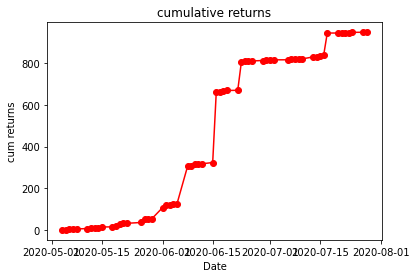

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


Expected annual return: 33153335349.4%
Conditional Value at Risk: -1301.20%
Cummulative Returns: 947.8588389863362
Funds remaining (CVAR): $12.02


/usr/local/lib/python3.7/dist-packages/pypfopt/discrete_allocation.py:210: RuntimeWarning: invalid value encountered in true_divide
  current_weights /= current_weights.sum()


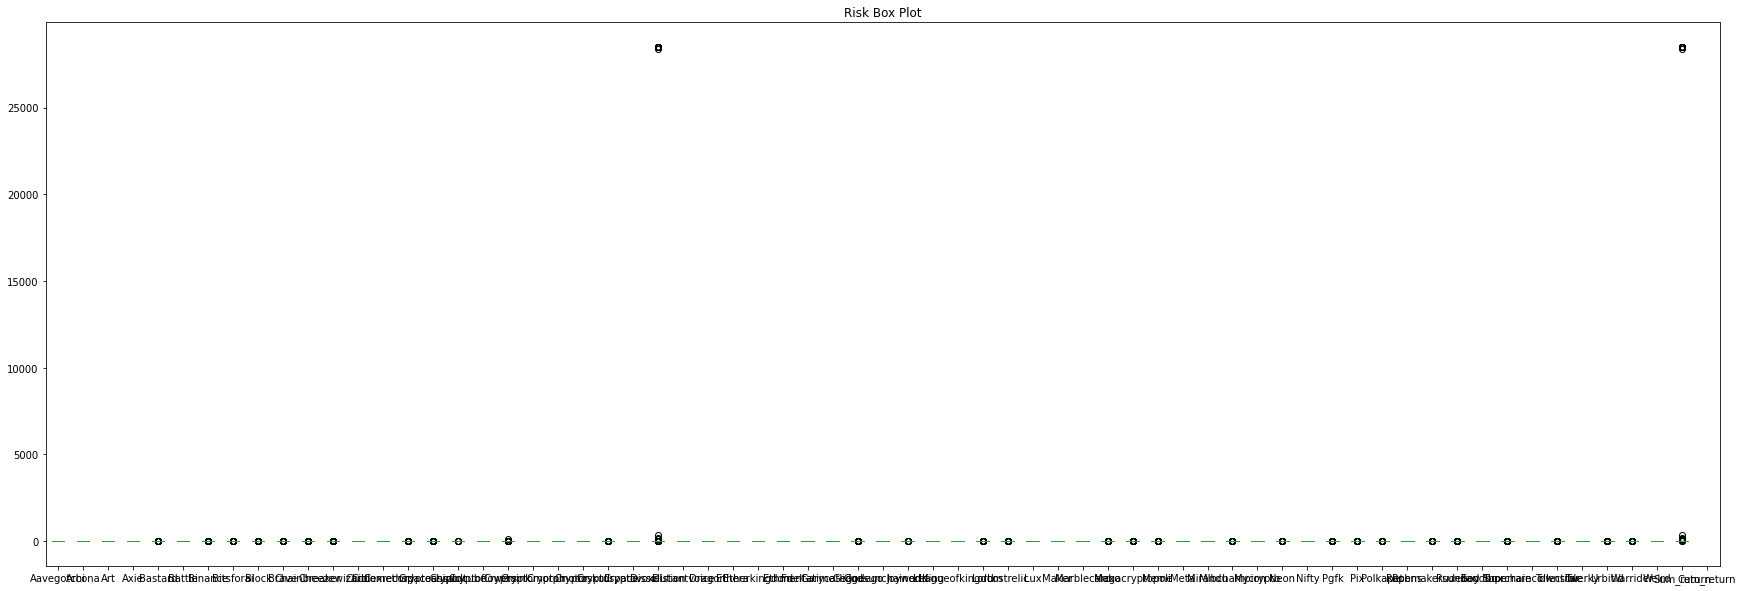

In [84]:
cleaned_weights = mcvar(matrix_df1, new_feed, 1000)

In [ ]:
weights = list(cleaned_weights.values())

# test strategies to get cum return

In [87]:
# test_mvr

def test_mvr(df, new_feed, funds):
  mu = mean_historical_return(df)
  S = df.cov()
  ef_cvar = EfficientCVaR(mu, S)
  cvar_weights = ef_cvar.min_cvar()
  cleaned_weights = ef_cvar.clean_weights()
  weights = list(cleaned_weights.values())
  ret_data = new_feed.pct_change()[1:]
  weighted_returns1 = ret_data * weights
  weighted_returns1['Sum_return'] = weighted_returns1.sum(axis=1)
  weighted_returns1['Cum_return'] = weighted_returns1['Sum_return'].cumsum()
  weighted_returns1['Cum_return'].replace([np.inf, -np.inf], np.nan, inplace=True)
  cum_list = weighted_returns1['Cum_return'].dropna()
  cum_return = cum_list[-1]
  return cum_return


In [89]:
# test hrp

def test_hrp(df, new_feed, funds):
  mu = mean_historical_return(df)
  S = CovarianceShrinkage(df).ledoit_wolf()
  returns = df.pct_change().dropna()
  hrp = HRPOpt(returns)
  cleaned_weights = hrp.optimize()
  weights = list(cleaned_weights.values())
  ret_data = new_feed.pct_change()[1:]
  weighted_returns1 = ret_data * weights
  weighted_returns1['Sum_return'] = weighted_returns1.sum(axis=1)
  weighted_returns1['Cum_return'] = weighted_returns1['Sum_return'].cumsum()
  weighted_returns1['Cum_return'].replace([np.inf, -np.inf], np.nan, inplace=True)
  cum_list = weighted_returns1['Cum_return'].dropna()
  cum_return = cum_list[-1]
  return cum_return

In [92]:
def test_mcvr(df, new_feed, funds):
  mu = mean_historical_return(df)
  S = df.cov()
  ef_cvar = EfficientCVaR(mu, S)
  cvar_weights = ef_cvar.min_cvar()
  cleaned_weights = ef_cvar.clean_weights()
  weights = list(cleaned_weights.values())
  ret_data = new_feed.pct_change()[1:]
  weighted_returns1 = ret_data * weights
  weighted_returns1['Sum_return'] = weighted_returns1.sum(axis=1)
  weighted_returns1['Cum_return'] = weighted_returns1['Sum_return'].cumsum()
  weighted_returns1['Cum_return'].replace([np.inf, -np.inf], np.nan, inplace=True)
  cum_list = weighted_returns1['Cum_return'].dropna()
  cum_return = cum_list[-1]
  return cum_return

In [94]:
return1 = test_mcvr(matrix_df1, new_feed, 10000)
return1

947.8588389863362